# Análise gráfica Wind Osório 2019

## Preparando ambiente

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [3]:
sns.set(rc={'figure.figsize':(15, 9)})

## Carregando os dados

In [4]:
pv = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/dias-tipicos/main/data/pv_osorio_2019.csv', header=3)
pv.sample(5)

,time,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
3606,2019-05-31 06:00,2019-05-31 03:00,0.000,0.0,0.000,15.021
8696,2019-12-29 08:00,2019-12-29 06:00,0.003,0.0,0.012,22.267
8576,2019-12-24 08:00,2019-12-24 06:00,0.004,0.0,0.013,16.574
7537,2019-11-11 01:00,2019-11-10 23:00,0.000,0.0,0.000,18.893
6606,2019-10-03 06:00,2019-10-03 03:00,0.000,0.0,0.000,17.068


In [5]:
pv.dtypes

time                   object
local_time             object
electricity           float64
irradiance_direct     float64
irradiance_diffuse    float64
temperature           float64
dtype: object

In [6]:
del pv['time']
pv['local_time'] = pd.to_datetime(pv['local_time'])
print(pv.dtypes)
pv.sample(5)

local_time            datetime64[ns]
electricity                  float64
irradiance_direct            float64
irradiance_diffuse           float64
temperature                  float64
dtype: object


,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
6089,2019-09-11 14:00:00,0.346,0.111,0.300,21.375
4580,2019-07-10 17:00:00,0.003,0.004,0.007,16.869
7721,2019-11-18 15:00:00,0.664,0.741,0.107,24.303
4622,2019-07-12 11:00:00,0.664,0.712,0.114,19.842
3217,2019-05-14 22:00:00,0.000,0.000,0.000,16.555


In [7]:
pv.describe()

,electricity,irradiance_direct,irradiance_diffuse,temperature
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.178378,0.151754,0.070931,19.784855
std,0.248617,0.259802,0.096298,4.717214
min,0.000000,0.000000,0.000000,4.599000
25%,0.000000,0.000000,0.000000,16.881250
50%,0.001000,0.000000,0.006000,20.032000
75%,0.345000,0.197000,0.117000,22.949000
max,0.839000,0.989000,0.446000,33.524000


## Análise correlação

In [24]:
corr = pv[['electricity', 'irradiance_direct',	'irradiance_diffuse',	'temperature']].corr()
corr

,electricity,irradiance_direct,irradiance_diffuse,temperature
electricity,1.000000,0.954326,0.670998,0.365949
irradiance_direct,0.954326,1.000000,0.422666,0.304358
irradiance_diffuse,0.670998,0.422666,1.000000,0.412539
temperature,0.365949,0.304358,0.412539,1.000000


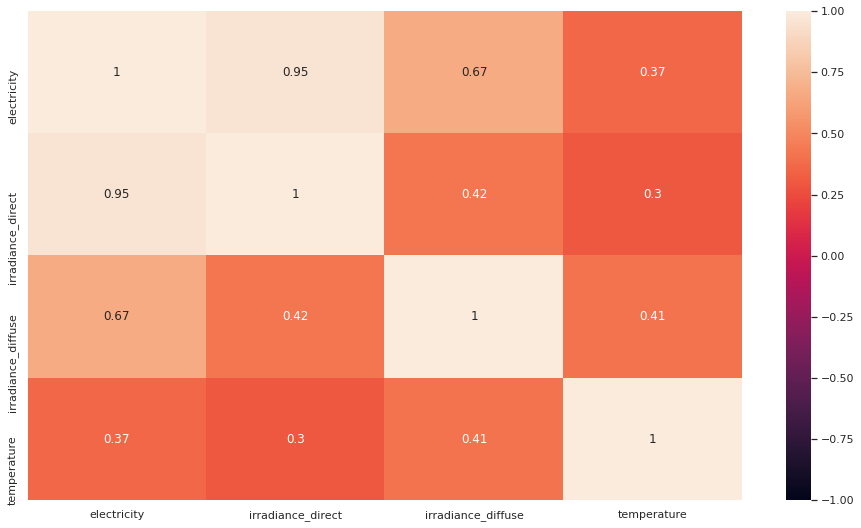

In [26]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True);

## Visualizando a time series

### `irradiance_direct`

Criando as variáveis de análise (aumento, aceleração e crescimento)

In [12]:
pv['idirect_aumento'] = pv[['irradiance_direct']].diff()
pv['idirect_aceleracao'] = pv['idirect_aumento'].diff()
pv['idirect_media_movel_dia'] = pv['irradiance_direct'].rolling(24).mean()
pv['idirect_media_movel_semana'] = pv['irradiance_direct'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.irradiance_direct)):
    anterior = pv.irradiance_direct[index - 1]
    c = round(((pv.irradiance_direct[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['idirect_crescimento'] = crescimento
pv

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento
0,2018-12-31 22:00:00,0.000,0.000,0.000,24.202,NaN,NaN,NaN,NaN,NaN
1,2018-12-31 23:00:00,0.000,0.000,0.000,23.979,0.000,NaN,NaN,NaN,0.00
2,2019-01-01 00:00:00,0.000,0.000,0.000,23.806,0.000,0.000,NaN,NaN,0.00
3,2019-01-01 01:00:00,0.000,0.000,0.000,23.679,0.000,0.000,NaN,NaN,0.00
4,2019-01-01 02:00:00,0.000,0.000,0.000,23.633,0.000,0.000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 17:00:00,0.215,0.037,0.231,29.056,-0.013,0.002,0.12700,0.192190,-0.26
8756,2019-12-31 18:00:00,0.126,0.014,0.149,28.214,-0.023,-0.010,0.12425,0.191524,-0.62
8757,2019-12-31 19:00:00,0.028,0.000,0.047,26.889,-0.014,0.009,0.12425,0.191524,-1.00
8758,2019-12-31 20:00:00,0.000,0.000,0.001,25.714,0.000,0.014,0.12425,0.191524,0.00


Plotando a relação da variável com o tempo na mesma figura para comparação.

In [13]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento'],
      dtype='object')

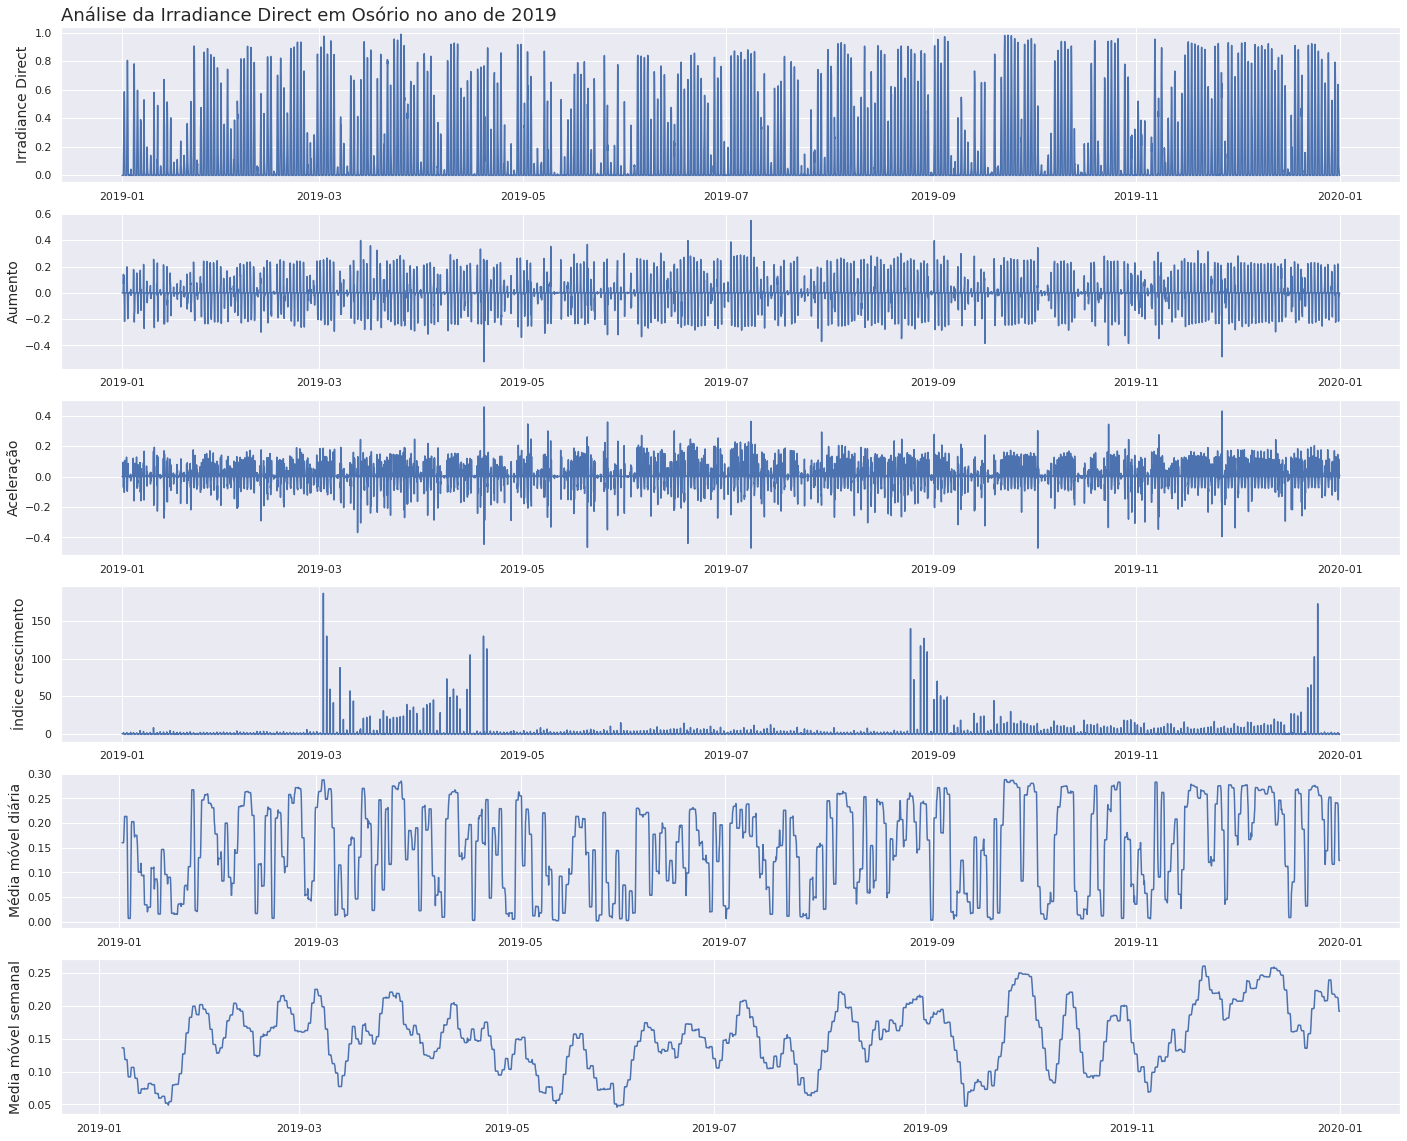

In [14]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Irradiance Direct em Osório no ano de 2019',fontsize=18, loc='left')
lp_irradiance_direct = sns.lineplot(x='local_time', y='irradiance_direct', data=pv)
lp_irradiance_direct.set_xlabel('')
lp_irradiance_direct.set_ylabel('Irradiance Direct', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='idirect_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='idirect_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='idirect_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='idirect_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='idirect_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [15]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento'],
      dtype='object')

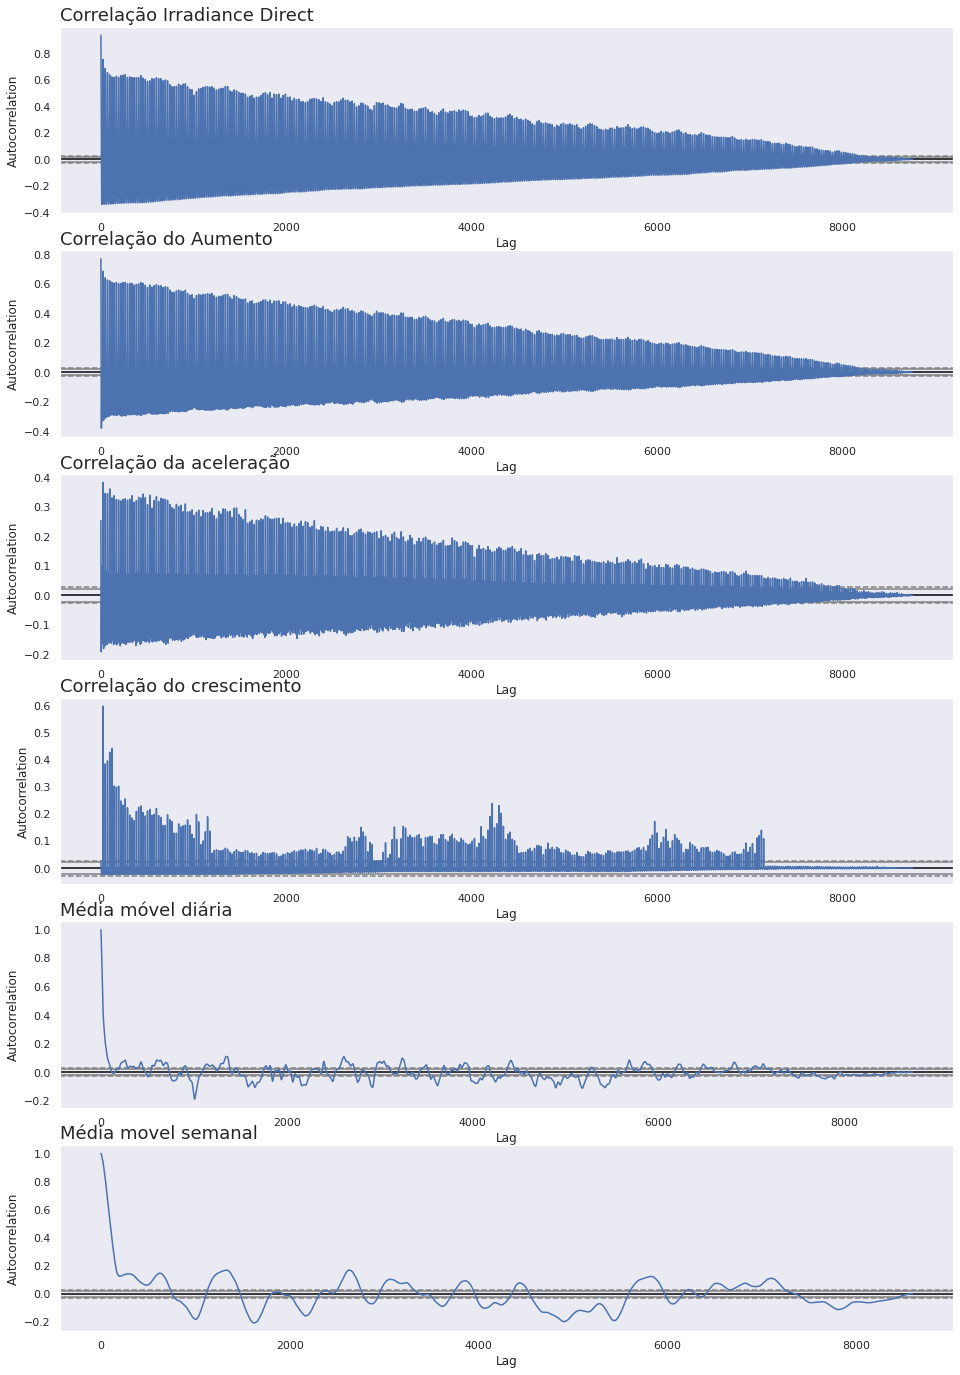

In [16]:
plt.figure(figsize=(16,24))

ac_irradiance_direct = plt.subplot(6,1,1)
autocorrelation_plot(pv['irradiance_direct'], ax = ac_irradiance_direct);
ac_irradiance_direct.set_title('Correlação Irradiance Direct', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['idirect_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['idirect_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['idirect_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['idirect_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['idirect_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

### `irradiance_diffuse`

In [27]:
pv['idiffuse_aumento'] = pv[['irradiance_diffuse']].diff()
pv['idiffuse_aceleracao'] = pv['idiffuse_aumento'].diff()
pv['idiffuse_media_movel_dia'] = pv['irradiance_diffuse'].rolling(24).mean()
pv['idiffuse_media_movel_semana'] = pv['irradiance_diffuse'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.irradiance_diffuse)):
    anterior = pv.irradiance_diffuse[index - 1]
    c = round(((pv.irradiance_diffuse[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['idiffuse_crescimento'] = crescimento
pv

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento,idiffuse_aumento,idiffuse_aceleracao,idiffuse_media_movel_dia,idiffuse_media_movel_semana,idiffuse_crescimento
0,2018-12-31 22:00:00,0.000,0.000,0.000,24.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-31 23:00:00,0.000,0.000,0.000,23.979,0.000,NaN,NaN,NaN,0.00,0.000,NaN,NaN,NaN,0.00
2,2019-01-01 00:00:00,0.000,0.000,0.000,23.806,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
3,2019-01-01 01:00:00,0.000,0.000,0.000,23.679,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
4,2019-01-01 02:00:00,0.000,0.000,0.000,23.633,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 17:00:00,0.215,0.037,0.231,29.056,-0.013,0.002,0.12700,0.192190,-0.26,-0.062,-0.012,0.114917,0.086125,-0.21
8756,2019-12-31 18:00:00,0.126,0.014,0.149,28.214,-0.023,-0.010,0.12425,0.191524,-0.62,-0.082,-0.020,0.116083,0.086565,-0.35
8757,2019-12-31 19:00:00,0.028,0.000,0.047,26.889,-0.014,0.009,0.12425,0.191524,-1.00,-0.102,-0.020,0.115333,0.086530,-0.68
8758,2019-12-31 20:00:00,0.000,0.000,0.001,25.714,0.000,0.014,0.12425,0.191524,0.00,-0.046,0.056,0.115250,0.086518,-0.98


In [28]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento'],
      dtype='object')

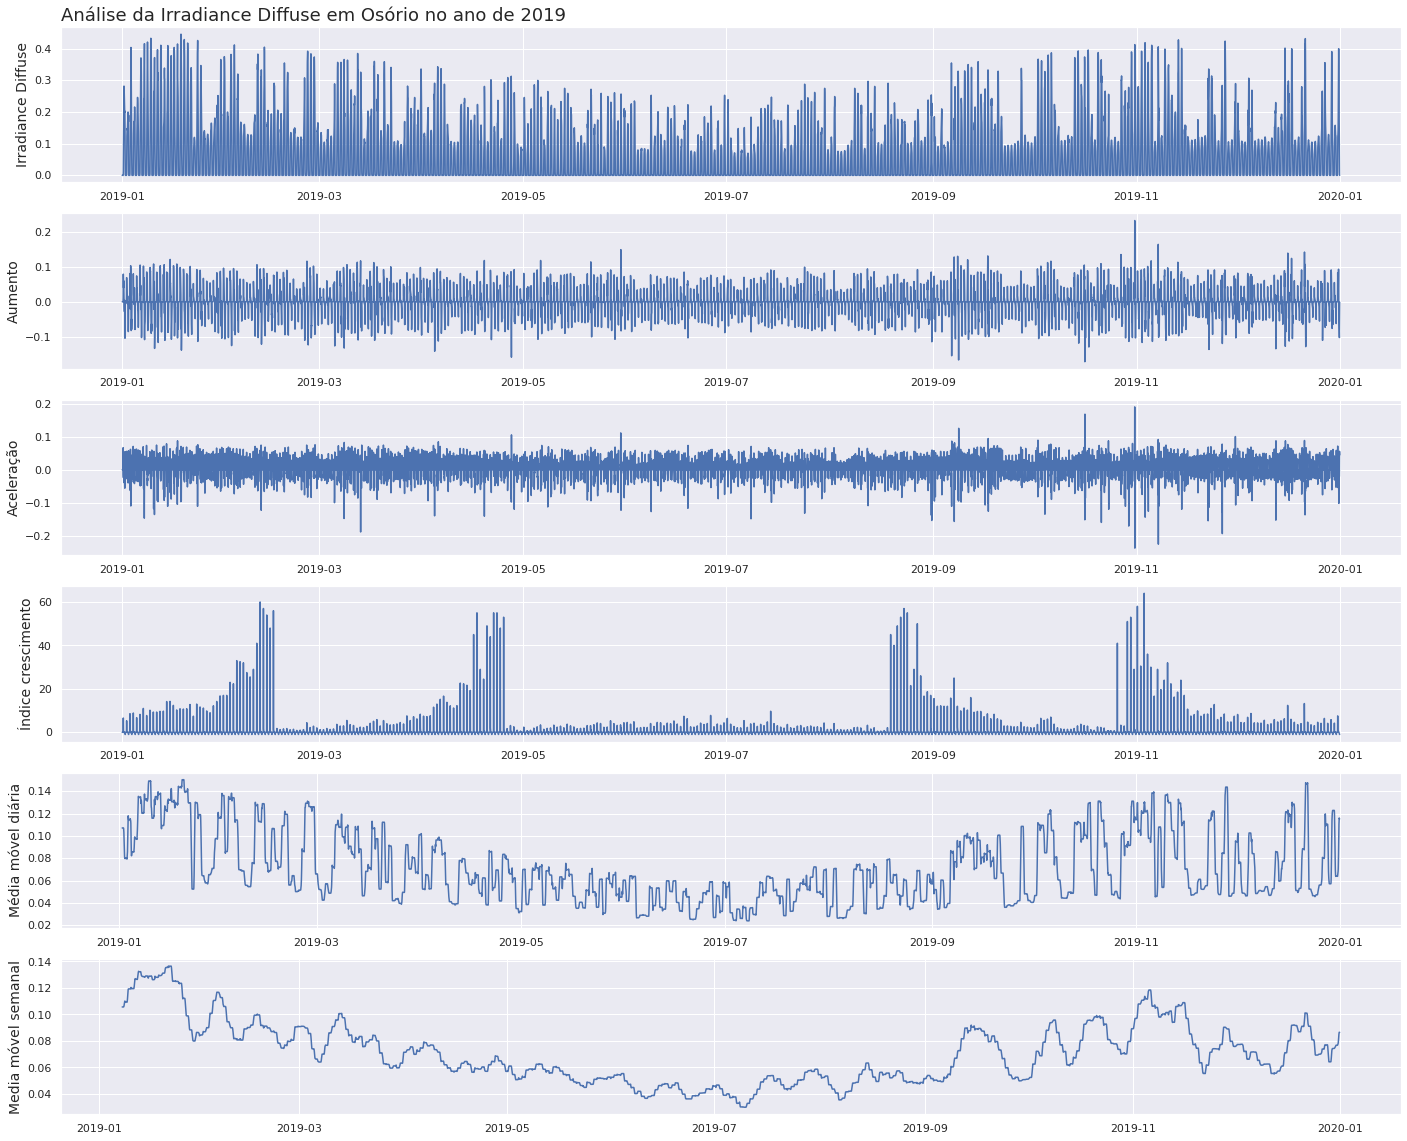

In [29]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Irradiance Diffuse em Osório no ano de 2019',fontsize=18, loc='left')
lp_irradiance_direct = sns.lineplot(x='local_time', y='irradiance_diffuse', data=pv)
lp_irradiance_direct.set_xlabel('')
lp_irradiance_direct.set_ylabel('Irradiance Diffuse', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='idiffuse_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='idiffuse_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='idiffuse_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='idiffuse_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='idiffuse_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [30]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento'],
      dtype='object')

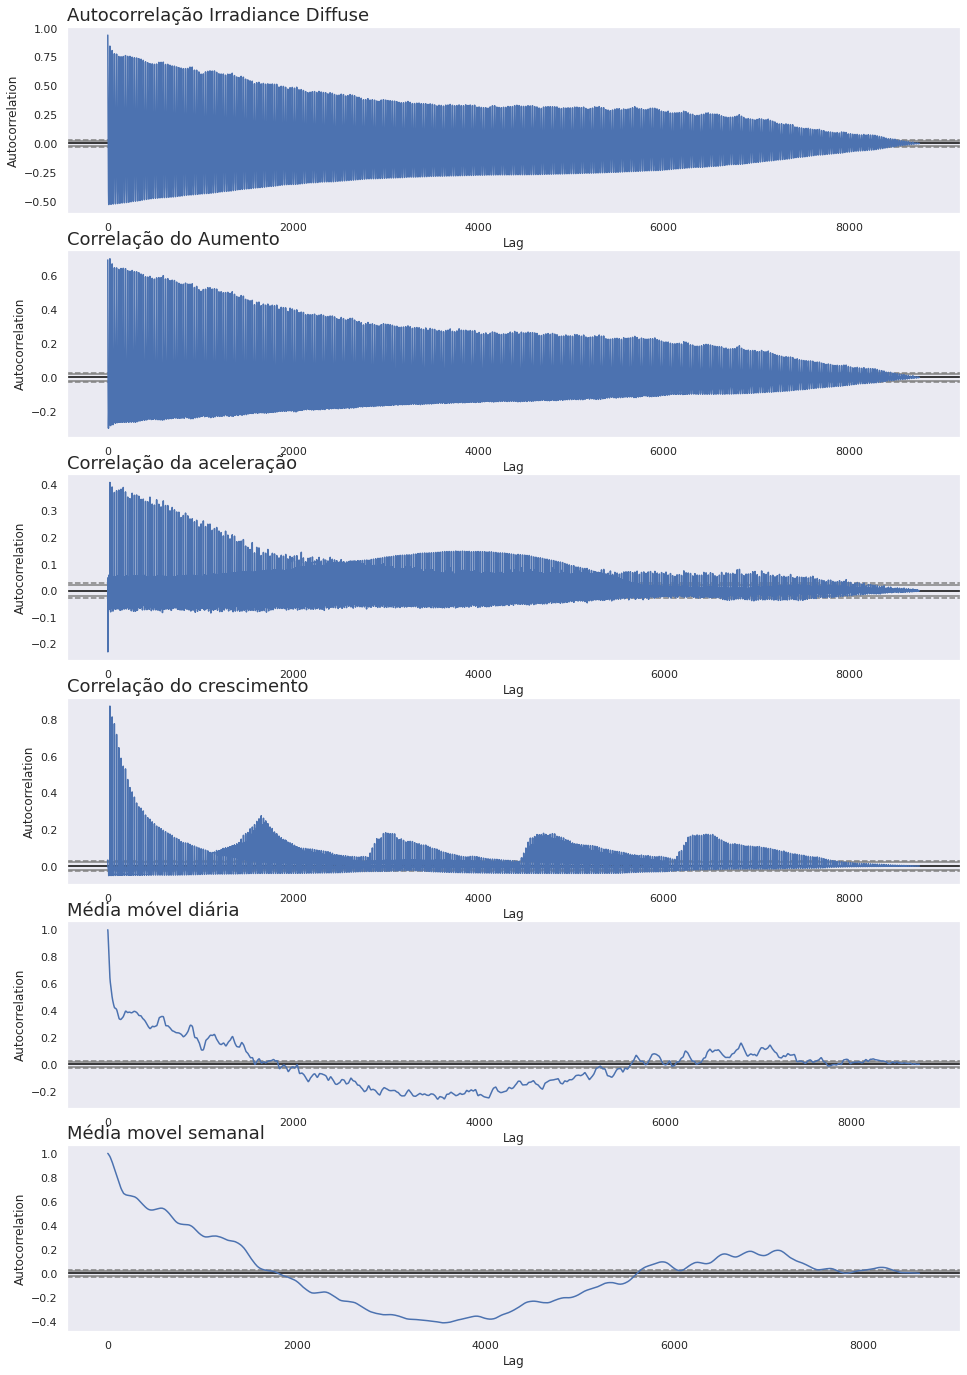

In [31]:
plt.figure(figsize=(16,24))

ac_irradiance_direct = plt.subplot(6,1,1)
autocorrelation_plot(pv['irradiance_diffuse'], ax = ac_irradiance_direct);
ac_irradiance_direct.set_title('Autocorrelação Irradiance Diffuse', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['idiffuse_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['idiffuse_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['idiffuse_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['idiffuse_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['idiffuse_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

### `temperature`

In [32]:
pv['temp_aumento'] = pv[['temperature']].diff()
pv['temp_aceleracao'] = pv['temp_aumento'].diff()
pv['temp_media_movel_dia'] = pv['temperature'].rolling(24).mean()
pv['temp_media_movel_semana'] = pv['temperature'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.temperature)):
    anterior = pv.temperature[index - 1]
    c = round(((pv.temperature[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['temp_crescimento'] = crescimento
pv.sample(5)

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento,idiffuse_aumento,idiffuse_aceleracao,idiffuse_media_movel_dia,idiffuse_media_movel_semana,idiffuse_crescimento,temp_aumento,temp_aceleracao,temp_media_movel_dia,temp_media_movel_semana,temp_crescimento
5408,2019-08-14 05:00:00,0.000,0.00,0.000,7.465,0.000,0.000,0.154500,0.134911,0.00,0.000,0.000,0.057708,0.058280,0.00,-0.012,-0.076,9.268625,15.673101,-0.00
2686,2019-04-22 19:00:00,0.000,0.00,0.000,18.825,0.000,0.024,0.190542,0.146685,0.00,0.000,0.031,0.053667,0.058738,0.00,-0.388,0.472,19.120000,20.720101,-0.02
1969,2019-03-23 22:00:00,0.000,0.00,0.000,18.681,0.000,0.000,0.275125,0.152875,0.00,0.000,0.000,0.042000,0.080030,0.00,-0.294,0.124,20.410500,21.603107,-0.02
4326,2019-06-30 03:00:00,0.000,0.00,0.000,21.186,0.000,0.000,0.196375,0.137899,0.00,0.000,0.000,0.032375,0.043482,0.00,-0.226,-0.082,22.375625,17.565286,-0.01
4481,2019-07-06 14:00:00,0.649,0.69,0.071,10.185,-0.121,-0.132,0.171458,0.154696,-0.15,-0.007,0.007,0.037125,0.037964,-0.09,0.329,-0.281,7.667583,12.047506,0.03


In [33]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento', 'temp_aumento', 'temp_aceleracao',
       'temp_media_movel_dia', 'temp_media_movel_semana', 'temp_crescimento'],
      dtype='object')

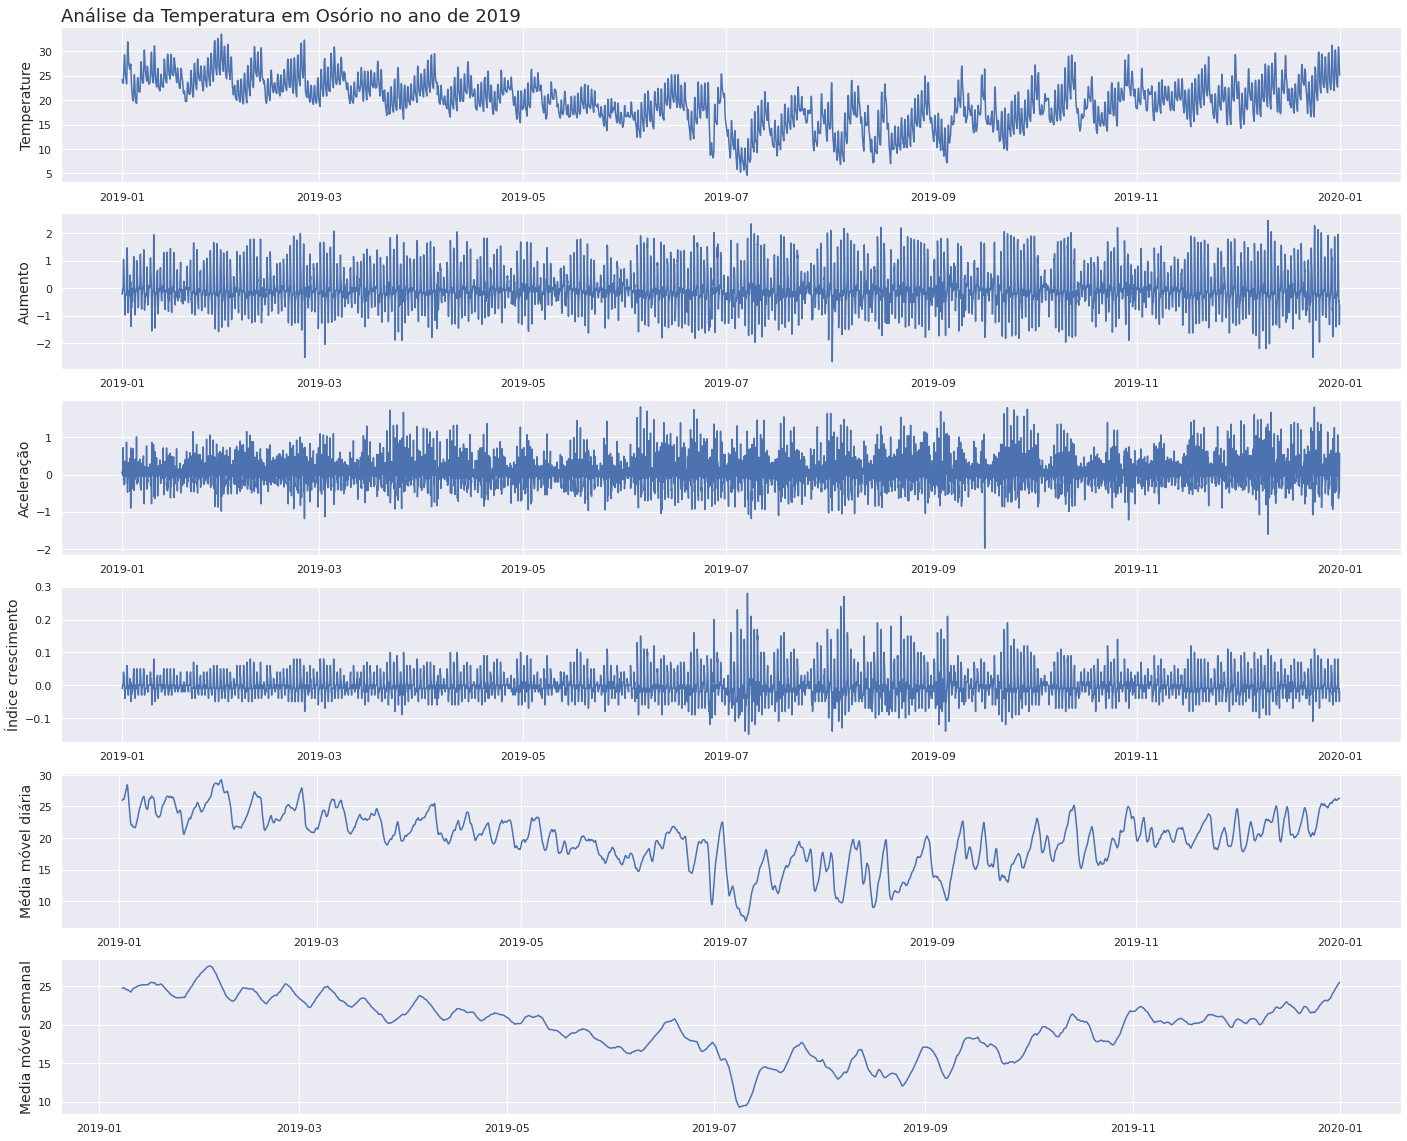

In [34]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Temperatura em Osório no ano de 2019',fontsize=18, loc='left')
lp_temperature = sns.lineplot(x='local_time', y='temperature', data=pv)
lp_temperature.set_xlabel('')
lp_temperature.set_ylabel('Temperature', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='temp_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='temp_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='temp_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='temp_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='temp_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [35]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento', 'temp_aumento', 'temp_aceleracao',
       'temp_media_movel_dia', 'temp_media_movel_semana', 'temp_crescimento'],
      dtype='object')

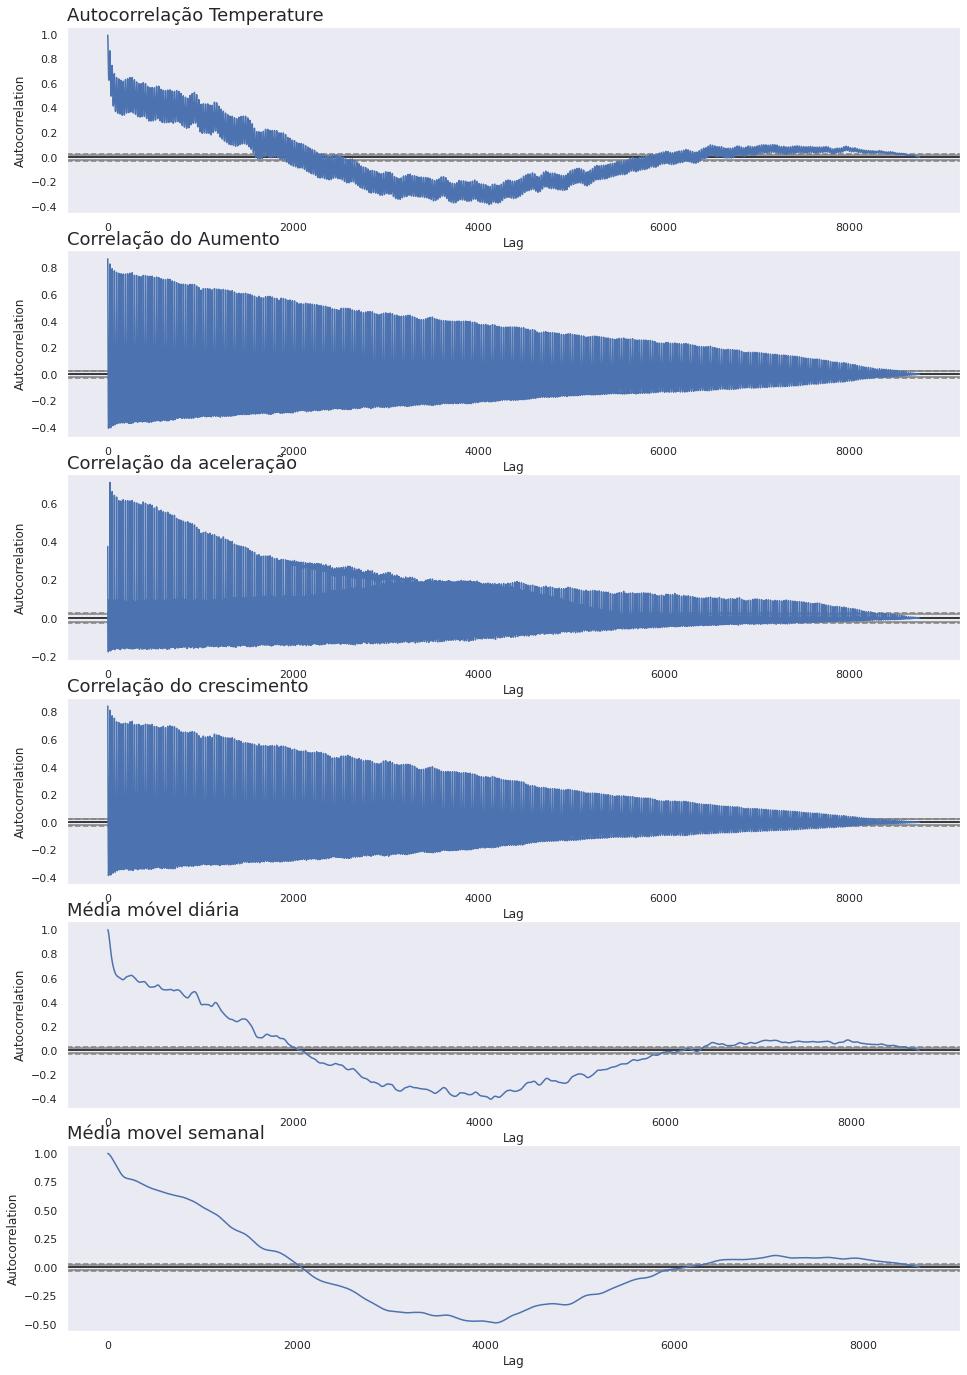

In [36]:
plt.figure(figsize=(16,24))

ac_temperature = plt.subplot(6,1,1)
autocorrelation_plot(pv['temperature'], ax = ac_temperature);
ac_temperature.set_title('Autocorrelação Temperature', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['temp_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['temp_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['temp_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['temp_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['temp_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

## Salvando o dataset completo

In [37]:
pv.to_csv('pv_osorio_2019_analise.csv')